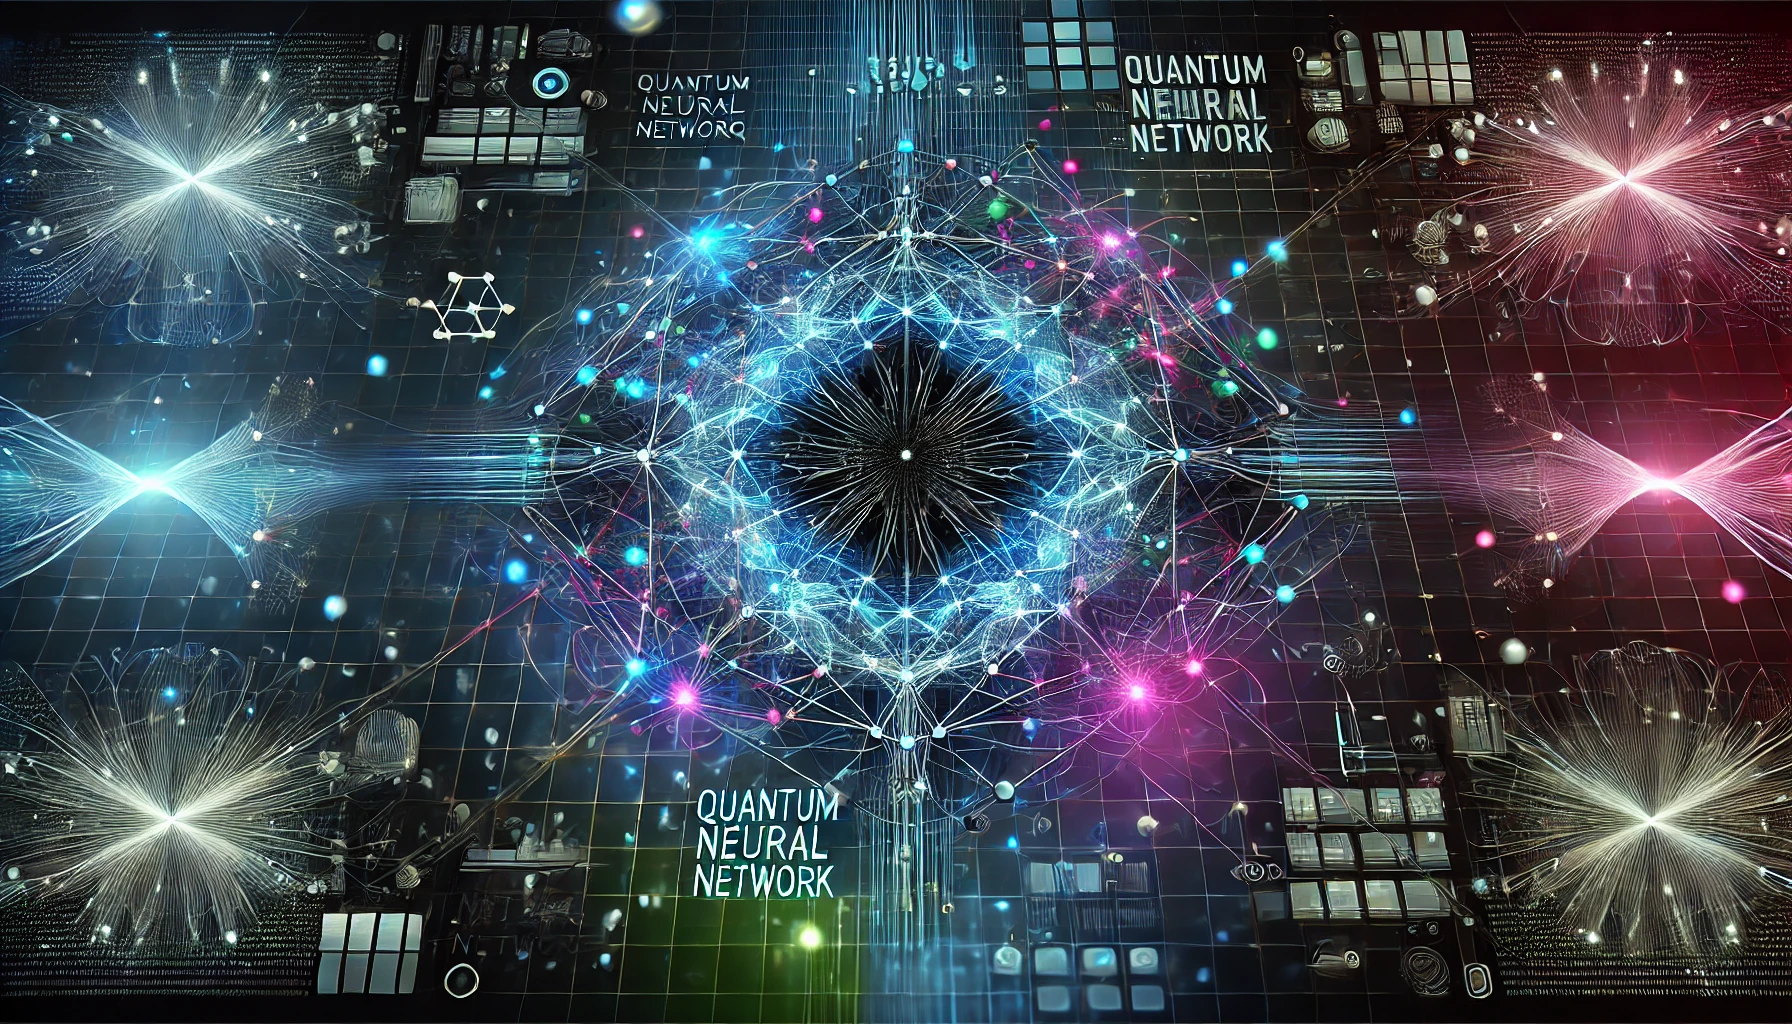

# **Quantum Neural Network**

Quantum Machine Learning can offer us several advantages over Classical ALgorithm, owing to the greater computational power that quantum computing offers.

There are four different approaches to combining quantum computing and machine learning, differentiated by whether the data is classical (C) or quantum (Q), or whether the algorithm runs on a classical (C) or quantum (Q) computer.

In this context, a quantum dataset consists of observations from a natural or artificial quantum system, such as measurements of qubit interactions, while a classical dataset consists of observations from a classical system, such as time series, text, or images.

In [1]:
! pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 2.6 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit.library import ZZFeatureMap

# Parameterized Quantum Circuits

In such a circuit we use gates with tunable paramters. So obviously, these are more or less the building blocks of Quantum Machine Learning Algorithms. A basic Parameterized gate is as follows.

In [3]:
theta = ParameterVector('θ', length=2)

qc = QuantumCircuit(2)
qc.ry(theta[0], 0)      # adds a Rotation-Y gate with paramter value Theta.
qc.cry(theta[1], 0, 1)  # adds a Controlled Rotation-Y gate. The value of controlled Qubit-1 depends on Qubit 0
qc.draw()

┌──────────┐            
q_0: ┤ Ry(θ[0]) ├─────■──────
     └──────────┘┌────┴─────┐
q_1: ────────────┤ Ry(θ[1]) ├
                 └──────────┘

To use parameterized quantum circuits as a machine learning model, we need them to generalize well. This means that the circuit should be able to generate a significant subset of the states within the output **Hilbert space**.

(In quantum mechanics the state of a physical system is represented by a vector in a Hilbert space: a complex vector space with an inner product. The term *Hilbert space* is often reserved for an infinite-dimensional inner product space having the property that it is complete or closed.)

The expressibility of a parameterized quantum circuit is essentially the coverage of the Hilbert space by the circuit's hypothesis space. Highly expressive parameterized quantum circuits can represent many different unitaries,that is they are more generalizable

In quantum machine learning, parameterized quantum circuits tend to be used for two things:

- To encode data, where the parameters are determined by the data being encoded
- As a quantum model, where the parameters are determined by an optimization process.

## ZZ Feature Map

In machine learning (both classical and Quantum), pattern recognition and image processing, a feature map starts from an initial set of measured data and builds derived values (also known as features) intended to be informative and non-redundant, facilitating the subsequent learning and generalization steps, and in some cases leading to better human interpretations. Feature Maps also Help in Dimensionality Reduction.

ZZ Feature Map is aFeature map in Qiskit.It's used to encode classical data (like numbers or text) into a quantum state by applying specific operations on qubits.

It encodes second-order interactions between classical data points onto a quantum state. This means it captures relationships between pairs of features in our data.t utilizes controlled Z-rotations (CZ gates) to encode these interactions.

In [4]:
qc_zz = ZZFeatureMap(3, reps=1, insert_barriers=True)
qc_zz.decompose().draw()

┌───┐ ░ ┌─────────────┐                                               »
q_0: ┤ H ├─░─┤ P(2.0*x[0]) ├──■────────────────────────────────────■────■──»
     ├───┤ ░ ├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐  │  »
q_1: ┤ H ├─░─┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──┼──»
     ├───┤ ░ ├─────────────┤└───┘└──────────────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├─░─┤ P(2.0*x[2]) ├──────────────────────────────────────────┤ X ├»
     └───┘ ░ └─────────────┘                                          └───┘»
«                                               »
«q_0: ──────────────────────────────────■───────»
«                                       │       »
«q_1: ──────────────────────────────────┼────■──»
«     ┌──────────────────────────────┐┌─┴─┐┌─┴─┐»
«q_2: ┤ P(2.0*(π - x[0])*(π - x[2])) ├┤ X ├┤ X ├»
«     └──────────────────────────────┘└───┘└───┘»
«                                          
«q_0: ─────────────────────────────────────
«                                          
«q_1: ──────────────────────────────────■──
«     ┌──────────────────────────────┐┌─┴─┐
«q_2: ┤ P(2.0*(π - x[1])*(π - x[2])) ├┤ X ├
«     └──────────────────────────────┘└───┘

Now we can create a Paramterized circuit in Qiksit using frameworks like **TwoLocal**, **NLocal**, **QAOA** etc.

# Training of Parameterized Quantum Circuits

Training of og QCs is somewhat similar to that of classical machine learning methods, that is we can mathematically express the learning process as minimization of cost function/loss fucntion(The objective function). In QML,we try to minimise the expectation value.

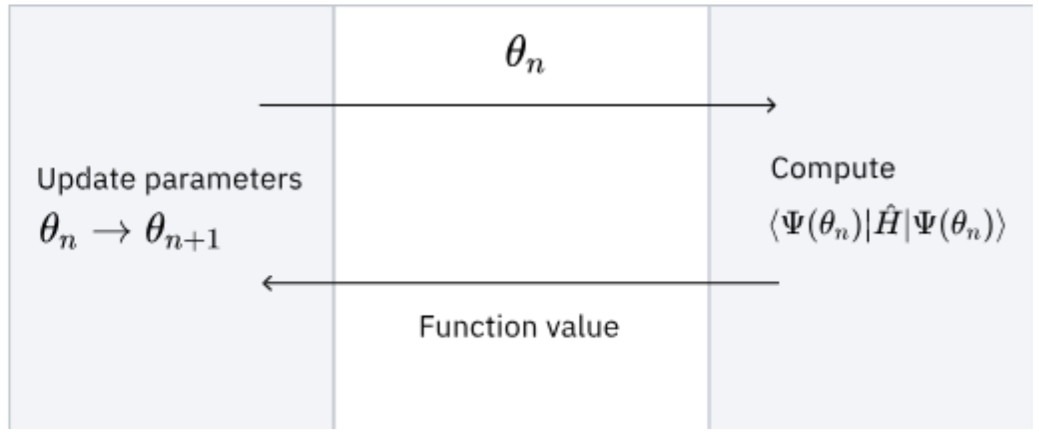

Now just like classical Machine Learning twe can use both ML algorithms and Neural Networks. This notebook however focuses on Neural Networks.

Now Classical NNs were inspired from the human brain and made to solve Complex problems and are building blocks for a number of applications like Computer Vision, Natural Language Processing, Speech Processing etc. Quantum Neural Networks aims to leverage Quantum Computing.

QNNs work on parameterized quantum circuits that are trianed in VAriantional manner using classical optimizers. These circuits contain feature map (with input paramters) and an ansatz (the trainable weights). So, I feel ***we have reduced the QNNs to our beloved Classical NNs***.

We can use qiskit primitives to run QNNs as either simulations or even on real Quantum Hardware (though there is a queue that your job ahs to enter in order to execute on a real device and you also need to login to IBM Qiskit).

The Neural Network class is the interface for all QNNs available in qiskit-machine-learning. It exposes a forward and a backward pass that take data samples and trainable weights as input.

It’s important to note that NeuralNetworks are “stateless”. They do not contain any training capabilities (these are pushed to the actual algorithms or applications: classifiers, regressors etc.), nor do they store the values for trainable weights

In [5]:
!pip install qiskit-algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 5.4 MB/s eta 0:00:00


In [6]:
! pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=0019ff5510057835592bc153629637ce1a4b8192a503e4a4af046d6f2263fc94
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [7]:
! pip install qiskit-machine-learning==0.7.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 5.0 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512545 sha256=5db46ef890587f35702a249199426f94f589d417fe34a9ae0b3f1378f039c1bc
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [8]:
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 42     # The random seed from Classical ML

## Estimator QNNs

Estimator QNN is one of the way used to initialise a QNN. It takes a paramterized quantum circuit as input as ell as list of optional Observables and outputs the expectation value. We can also provide a list of observables to further complicate our NN. (In quantum mechanics, an observable is an operator, where the property of the quantum state can be determined by some sequence of operations.)

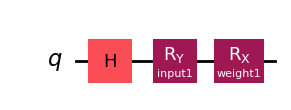

In [9]:
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit

params1 = [Parameter("input1"), Parameter("weight1")]
qc = QuantumCircuit(1)
qc.h(0)
qc.ry(params1[0], 0)
qc.rx(params1[1], 0)
qc.draw("mpl")

In [10]:
#Creating an observable
from qiskit.quantum_info import SparsePauliOp

observable1 = SparsePauliOp.from_list([("Y" * qc.num_qubits, 1)])     # If nothing is passecd It uses a "Z" Observable

Together with the quantum circuit defined above, and the observable we have created, the Estimator QNN constructor takes in the following keyword arguments:

- **estimator**: optional primitive instance

- **input_params**: list of quantum circuit parameters that should be treated as `network inputs`

- **weight_params**: list of quantum circuit parameters that should be treated as `network weights`

If we want to use cloud resources or use Aer simulators we would have to use the Estimator instance to pass into Estimator QNN.

In [11]:
from qiskit_machine_learning.neural_networks import EstimatorQNN

estimator_qnn = EstimatorQNN(circuit=qc,
                             observables=observable1,
                             input_params=[params1[0]],
                             weight_params=[params1[1]])
estimator_qnn

## Sampler QNNs

We can also use **Sampler QNN** as an alternative to Estimator QNN. **It does not require us to use a custom observable**.

input parameters: ['input[0]', 'input[1]']
weight parameters: ['weight[0]', 'weight[1]', 'weight[2]', 'weight[3]']


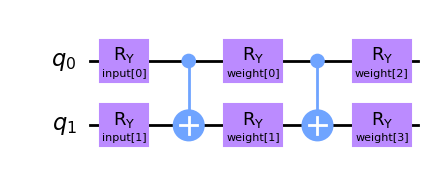

In [12]:
from qiskit.circuit import ParameterVector

inputs2 = ParameterVector("input", 2)
weights2 = ParameterVector("weight", 4)
print(f"input parameters: {[str(item) for item in inputs2.params]}")
print(f"weight parameters: {[str(item) for item in weights2.params]}")

qc2 = QuantumCircuit(2)
qc2.ry(inputs2[0], 0)
qc2.ry(inputs2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[0], 0)
qc2.ry(weights2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[2], 0)
qc2.ry(weights2[3], 1)

qc2.draw("mpl", style="clifford")

In [13]:
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.circuit import ParameterVector

sampler_qnn = SamplerQNN(circuit=qc2,
                         input_params=inputs2,
                         weight_params=weights2)
sampler_qnn

### Forward Pass

Now we are going more into our classical field, the one we are so familiar with **The Forward Pass**

In [14]:
sampler_qnn_ip = algorithm_globals.random.random(sampler_qnn.num_inputs)
sampler_qnn_wts = algorithm_globals.random.random(sampler_qnn.num_weights)

In [15]:
print(f"Number of input features for SamplerQNN: {sampler_qnn.num_inputs} \n Input: {sampler_qnn_ip}")
print(f"Number of trainable weights for SamplerQNN: {sampler_qnn.num_weights} \n Weights: {sampler_qnn_wts}")

Number of input features for SamplerQNN: 2 
 Input: [0.77395605 0.43887844]
Number of trainable weights for SamplerQNN: 4 
 Weights: [0.85859792 0.69736803 0.09417735 0.97562235]


- For the **Estimator QNN**, the expected output shape for the forward pass is (batch_size, num_qubits * num_observables).

- For the **Sampler QNN** (without a custom interpret function), the expected output shape for the forward pass is (1, 2* num_qubits). With a custom interpret function, the output shape will be (1, output_shape), where 1 in our case is the number of samples.

In [16]:
sampler_qnn_forward = sampler_qnn.forward(sampler_qnn_ip,
                                          sampler_qnn_wts)

print(f"Forward pass result for SamplerQNN: {sampler_qnn_forward}.  \nShape: {sampler_qnn_forward.shape}")

Forward pass result for SamplerQNN: [[0.23851185 0.1411135  0.3367757  0.28359895]].  
Shape: (1, 4)


### Backward Pass

So we have our weights for the forward pass. We have gone through half of our steps for the training of a Neural Networks. The next step again is a pretty familiar category : **The Backward Pass**

For the SamplerQNN (without custom interpret function), the expected output shape for the forward pass is (batch_size, 2* num_qubits, num_weights). With a custom interpret function, the output shape will be (batch_size, output_shape, num_weights). Now we can put gradient as True or False (default). Here I will be setting it True.

In [17]:
sampler_qnn.input_gradients = True
sampler_qnn_ip_grad, sampler_qnn_weight_grad = sampler_qnn.backward(sampler_qnn_ip,
                                                                    sampler_qnn_wts)

print(f"Input gradients for SamplerQNN: {sampler_qnn_ip_grad}.  \nShape: {sampler_qnn_ip_grad}")
print(f"Weight gradients for SamplerQNN: {sampler_qnn_weight_grad}.  \nShape: {sampler_qnn_weight_grad.shape}")

Input gradients for SamplerQNN: [[[ 0.00854017 -0.4260793 ]
  [ 0.29208826  0.08375938]
  [-0.35915753  0.17972714]
  [ 0.05852911  0.16259278]]].  
Shape: [[[ 0.00854017 -0.4260793 ]
  [ 0.29208826  0.08375938]
  [-0.35915753  0.17972714]
  [ 0.05852911  0.16259278]]]
Weight gradients for SamplerQNN: [[[ 0.00609879 -0.30661818 -0.1834591  -0.28341665]
  [-0.02969169  0.17866236  0.1834591  -0.20004909]
  [-0.37812738  0.30266095 -0.30904568  0.28341665]
  [ 0.40172028 -0.17470512  0.30904568  0.20004909]]].  
Shape: (1, 4, 4)


And so we have finally got our weights, i.e. we have trained our Quantum Neural Network using gradients.



Now training a Quantum Neural Network on custom data

# Regression with QNN

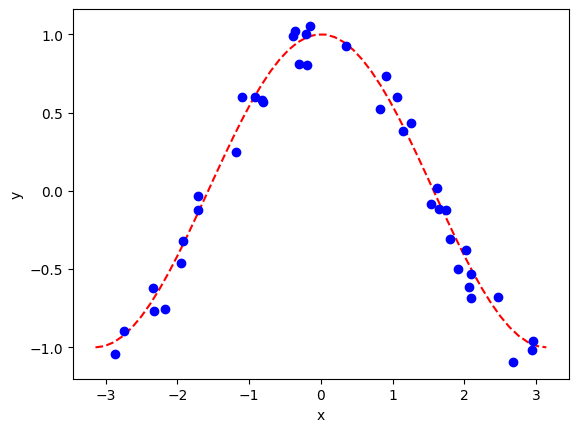

In [18]:
import numpy as np
import matplotlib.pyplot as plt


num_samples = 40
eps = 0.2
lb, ub = -np.pi, np.pi
X_ = np.linspace(lb, ub, num=50).reshape(50, 1)
f = lambda x:np.cos(x)

X = (ub - lb) * algorithm_globals.random.random([num_samples, 1]) + lb
y = f(X[:, 0]) + eps * (2 * algorithm_globals.random.random(num_samples) - 1)

plt.plot(X_, f(X_), "r--")
plt.plot(X, y, "bo")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [19]:
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
#from qiskit_machine_learning.circuit.library import QNNCircuit
from qiskit_machine_learning.circuit.library import QNNCircuit

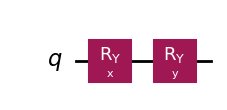

In [20]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()
param_x = Parameter("x")
feature_map = QuantumCircuit(1, name="fm")
feature_map.ry(param_x, 0)

# construct simple ansatz
param_y = Parameter("y")
ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y, 0)

qc = QNNCircuit(feature_map=feature_map, ansatz=ansatz)

#Here we can use our built-in Feature maps and Ansatz as well however given that this is a simple problem we can use these custom made ones as well. Also this gives us a idea that they are really not some difficult terms and how they look like at the small scale
regression_estimator_qnn = EstimatorQNN(circuit=qc)
# construct the regressor from the Quantum neural network
regressor = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=50),
    callback=callback_graph,
)

qc.draw("mpl")

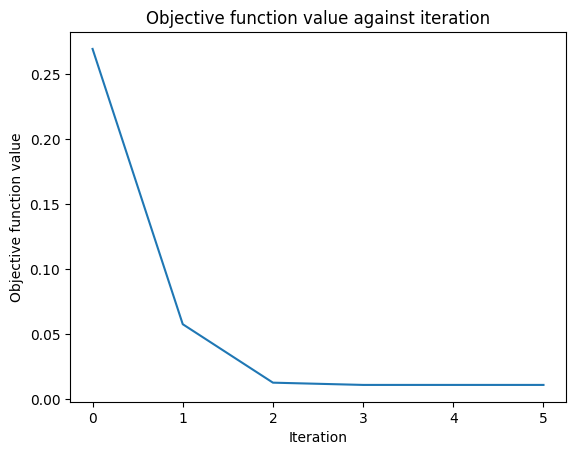

0.9756227572998851

In [21]:
objective_func_vals = []
regressor.fit(X, y)
regressor.score(X, y)

This plot shows the **objective function value** against the number of **iterations**. Here’s how to interpret it:

1. **Objective Function**: The objective function in optimization represents the value that the algorithm is trying to minimize (or maximize). Lower values of this function usually indicate a better solution to the problem being optimized.

2. **X-axis (Iteration)**: This represents the number of iterations the optimization algorithm has completed. Each iteration corresponds to a step in the optimization process.

3. **Y-axis (Objective Function Value)**: This shows the value of the objective function at each iteration. The goal is to minimize this value over successive iterations.

***Explanation***
- **Initial Value**: At the start (iteration 0), the objective function value is around 0.25.
- **Progress Over Iterations**: The plot shows a sharp drop in the objective function value over the first two iterations. After that, the value continues to decrease but at a slower rate, indicating that the optimization is reaching a stable point.
- **Convergence**: From around iteration 2 or 3 onward, the curve flattens out, suggesting that the objective function value has reached a minimum or is close to converging to the best possible solution.

***Conclusion***
This plot suggests that the optimization algorithm is effectively minimizing the objective function. After a few iterations, it reaches a point where further iterations do not result in significant improvement, indicating convergence.

### `R^2 Value` = 0.975

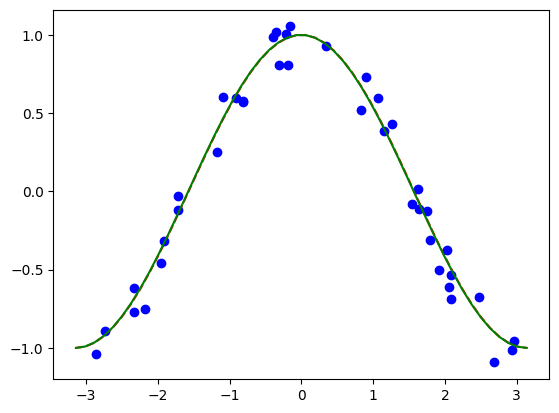

In [22]:
plt.plot(X_, f(X_), "r--")
plt.plot(X, y, "bo")
y_ = regressor.predict(X_)
plt.plot(X_, y_, "g-")
plt.show()

We can clearly see that our score is pretty low even on simple data(I know it is 97% in this case, but I also tried it on a simple 5 * $cos(x)$ and the score reduced so drastically, you can try any function of your choice and see the result). I personally feel that it is the simplicity of the model that has resulted in not so great score.However,even after using a better model (for more complex tasks) we are generally not able to match the scores of classical ML algos. This is because QML is a field in its infant stage and although it is catching up, I feel it would take sometime more to reach current levels, althouh we alraedy have all the fields of classical AI in Quantum Domain as well like Computer Vision, GANs, NPLs etc.

Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.7787
Epoch 2/7
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.9726  
Epoch 3/7
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.7660 
Epoch 4/7
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.8096
Epoch 5/7
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.3850 
Epoch 6/7
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.2971 
Epoch 7/7
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.6810
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


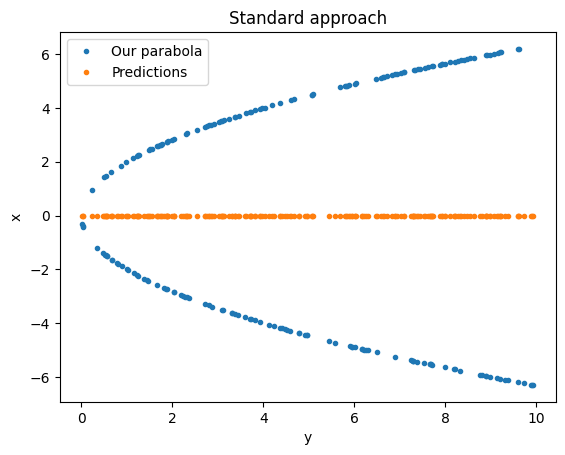

In [29]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

N = 200
# Here our data is a simple parabola that is y**2=4ax
X = np.random.uniform(0, 10, N)
sign = (-1) ** np.random.randint(2, size=N)
Y = np.sqrt(4*X) * sign

act = tf.keras.layers.ReLU()
nn = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation=act, input_shape=(1,)),
  tf.keras.layers.Dense(10, activation=act),
  tf.keras.layers.Dense(1,activation='relu')])


loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
nn.compile(optimizer=optimizer, loss=loss)

results = nn.fit(X, Y, epochs=7, batch_size= 5, verbose=1)
#Plotting( here is where I found this absurd situation)
plt.plot(X,Y,'.',label='Our parabola')
plt.plot(X,nn.predict(X),'.',label='Predictions')
plt.xlabel('y')
plt.ylabel('x')
plt.title('Standard approach')
plt.legend()
plt.show()

As we can see somehow all our prediction is just a straight line through $y = 0$. I feel like the only thing that is happening is that our Neural Network is taking the average of our data points.

# Conclusion

So basically,we need to treat physics problems differently when using DLL models. Obviusly while they are successful in determining even very complex real world relationships, (as I feel it) the fact remains nothing in real world data can prepare them for a parabolic distribution of data because they simply do not deal in negative values of variables.

So I am currently working on a notebook about methods to use while dealing with physics/maths problems as well as I'd try to use a Quantum NN for this problem and see if we can get something better. If someone has already done it or has any idea please do share the result.

In the end, If you have any kind of doubt or are looking to start Quantum Computing (that is why you have some trouble understanding gates) or if there is something wrong in here please free to comment.